In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
HOUSING_PATH = os.path.join("datasets", "housing")

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()

# 1) Análisis preliminar de los datos

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Quick description of the data

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Ojo**: fíjate que el campo *total_bedrooms* tiene nulos

## Summary of numerical attributes

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Fíjate en los percentiles del *housing_median_age*. El 25% de las viviendas tienen menos de 18 años, el 50% menos de 29 y el 75% menos de 37. Nota: la mediana es el cuartil 50%.

## Valores del atributo categórico "ocean_proximity"

In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Plotea histogramas
Para ver la distribución de los datos numéricos.

El método *.hist()* plotea todos los datos numéricos y nos ahorra tener que hacerlo uno a uno.

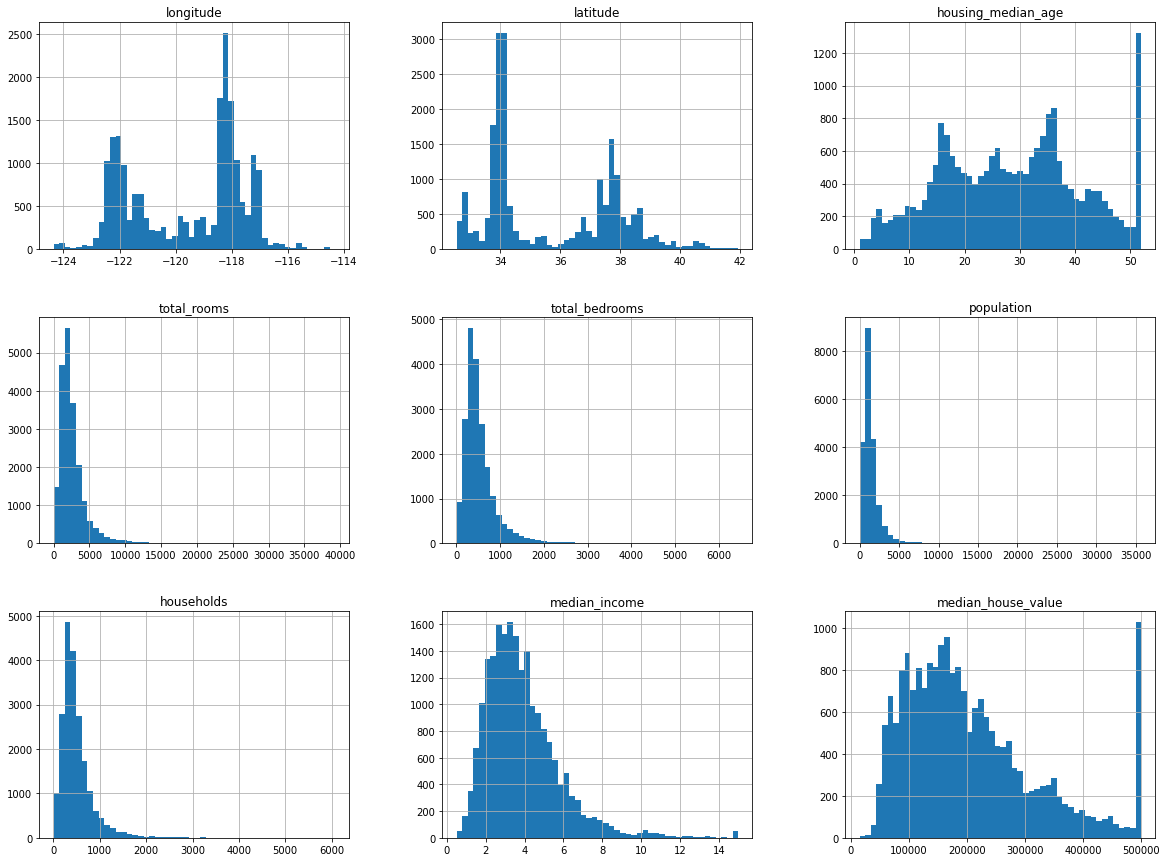

In [11]:
%matplotlib inline
housing.hist(bins = 50, figsize = (20, 15))
plt.show;

**Nota**

Fíjate en la línea vertical en el gráfico de *median_house_value*. Esta línea sale porque el set de datos tiene un techo de sueldos en los $500.000 a partir del cual se acumulan.

Lo mismo pasa en *housing_median_age*. Con el techo de edad de la casa en 50 años.

# Vamos allá

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

## Creo una categoría *median income*
Porque los jefes nos dicen que separar los datos así es súuuper importante para ellos o algo así.

<AxesSubplot:>

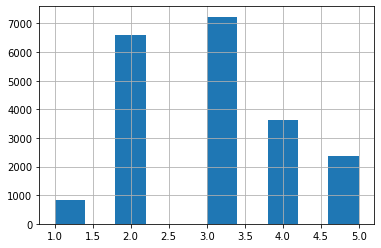

In [13]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins = [0, 1.5, 3.0, 4.5, 6, np.inf], 
                               labels = [1, 2, 3, 4, 5])

housing["income_cat"].hist()

## Separar un sample con datos de test
Fíjate que la distribución de *income_cat* no es uniforme. 

Si hacemos un un *train_test_split* facilón podemos quedarnos con demasiados datos de las categorías más grandes y caeríamos en un *selection bias*.

Por eso usamos *StratifiedShuffleSplit*. Para que separe datos de test de datos de entrenamiento de forma proporcional a cada categoría de *income_cat*.

**Importante** Este conjunto de datos lo separamos y no lo tocamos hasta que terminemos todo el proceso. 

Estos datos los utilizaremos al final cuando tengamos el modelo ya entrenado para evaluar la precisión de las predicciones.

Aunque se llamen datos de test estos datos son los X_test e y_test que usamos en el proceso de evaluación de modelos de machine learning. Son unos datos aislados que usaremos al final del todo.  

In [14]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

### Esta es la proporción de datos de las distintas categorías del set de test:

In [15]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

### Y esta la proporción del set completo:
Fíjate que se parecen mucho

In [16]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

## Una vez divididos los datos quito *median income*
Ya no la necesito para nada en los sets de test y de entrenamiento.

In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

## Visualizaciones

### Sample Set
Para entrar más en detalle en el análisis de los datos se coge un set de datos reducido pero representativo.

En un set de datos muy grande cogemos solo una parte de los datos.

Como este set es pequeño, lo usamos todo entero.

In [18]:
housing = strat_train_set.copy()

### Scatter Plot
**Nota**

Los datos son de el estado de California en los USA.

Al hacer el scatter plot por Latitud y Longitud vemos el perfil del estado y las áreas con mayor densidad.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

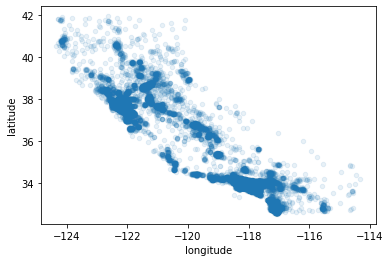

In [19]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

### Scatter plot con datos de Población y Precio
**población**: opción *s*. El radio de cada círculo representa la población.

**precio**: opción *c*. El color representa el precio medio (más rojo, más alto).

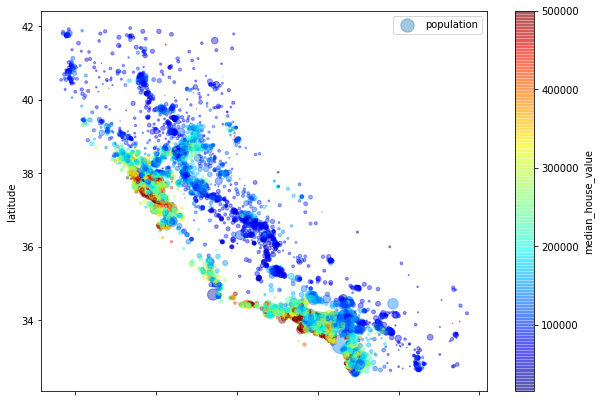

In [20]:
housing.plot(kind = "scatter",
            x = "longitude",
            y = "latitude",
            alpha = 0.4, 
            s = housing["population"] / 100,
            label = "population",
            figsize = (10, 7), 
            c = "median_house_value",
            cmap = plt.get_cmap("jet"),
            colorbar = True)

plt.legend()

### Standard Correlation Coefficient (Pearsons' r)
Mide la **correlación** entre cada par de atributos del data set. 

Este valor va de -1 a 1. 

Cuanto está cerca de 1 indica que hay una fuerte **correlación positiva**.
Cuando está cerca de -1 indica una fuerte **correlación negativa**.
Cuando está cerca de 0 indica que **no hay correlación linear**.

In [21]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Como puede verse, el valor más prometedor para predecir el *median_house_value* es el *median_income*.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

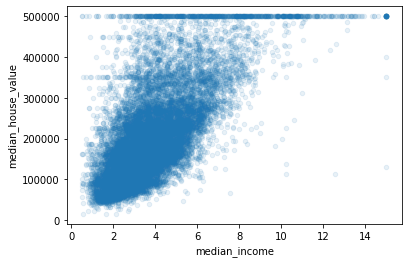

In [22]:
housing.plot(kind = "scatter",
            x = "median_income",
            y = "median_house_value",
            alpha = 0.1)

¿Qué vemos en este gráfico?
- La correlación es muy fuerte; puedes ver claramente la tendencia al alza y que los puntos no están demasiado dispersos.
- El techo de salario es visible (en los 500.000).
- Hay algunas *líneas horizontales* más que se pueden distinguir. Por ejemplo alrededor de los 450.000, 350.000 y alrededor de los 280.000. Podemos intentar quitar estos distritos para evitar que los algoritmos de machine learning aprendan de esto como un patrón.

### ¿Creamos nuevos atributos?
Viendo el *Pearson's r*, algunos atributos parecen interesantes, pero no por sí solos sino combindados.

Por ejemplo, *housing_rooms* combinado con *households*; *total_bedrooms* con *total_rooms*; *population* por *households*

In [23]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

Vamos a ver que tal queda la matriz contra *median_house_value*.

In [24]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

¿Que vemos aquí?
- Que el nuevo atributo *bedrooms_per_room* correlaciona más que los campos *total_bedrooms* y *total_rooms* por separado (aparentemente a un ratio menor de bedroom/room la casa es más cara).
- El atributo *rooms_per_household* también es más informativo que el *total_rooms* en todo el distrito (esto indica que, obviamente, cuanto más grande es la casa -i.e. más habitaciones-, más cara).

## Nota final
Estos pasos no son todos los que se pueden hacer, pero si son un buen punto de partida.

Este proceso de exploración nos da un *insight* de los datos. Pero no termina aquí, esto es un proceso iterativo. Una vez tenemos un prototipo y vamos conociendo los datos en profundidad podemos volver a la exploración para ver si sacamos más chicha.  

# 2) Preparar Datos para los Algoritmos de Machine Learning

## Separamos las Labels de las Features

In [25]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

### Valores Numéricos

#### Valores NaN
Como vimos antes, el campo *total_bedrooms* le faltan valores. Esto es, tiene valores nulos.

Algunos algoritmos de machine learning no funcionan bien con valores nulos.

Para solucionar esto hay tres opciones:
1. Quitar las filas donde haya campos nulos:

    `housing.dropna(subset = ["total_bedrooms"])`

2. Quitar el atributo *total_bedrooms*:

    `housing.drop("total_bedrooms", axis = 1)`

3. Asignar valores a los datos NaN (ceros, la media, la mediana, etc.):

    `median = housing["total_bedrooms"].median()`

    `housing["total_bedrooms"].fillna(median, inplace = True)`

    **nota**: si eliges la opción 3 guarda el valor de la mediana en una variable porque lo vas a necesitar más tarde para usarlo en los sets de entrenamiento y de test (para reemplazar los NaN en esos tests). 

#### Simple Imputer
Es una herramienta que nos ayuda a automatizar la limpieza de datos.

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

La *mediana* solo se puede calcular para atributos numéricos, así que hay que quitar los que no lo son (como *ocean_proximity*).

In [27]:
housing_num = housing.drop("ocean_proximity", axis = 1)

In [28]:
imputer.fit(housing_num)
X = imputer.transform(housing_num)

# El resultado es un array NumPy. Si queremos transformarlo de nuevo a un pandas DataFrame:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing_num.index)

Al calcular las transformaciones con el comando *fit()*, el imputer computa la *mediana* de cada atributo numérico y lo guarda en el atributo *statistics_*:

    `imputer.statistics_`

**Nota**: El único campo que hemos detectado con valores nulos es *total_bedrooms* pero nada nos garantiza que en los datos de producción aparezcan nulos en otros campos así que es más seguro utilizar un *imputer* sobre *todos* los atributos numéricos.

### Texto y Atributos Categóricos
En este set de datos el único valor que no es numérico es *ocean_proximity*.

In [29]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7276
INLAND             5263
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

Este campo tiene un número limitado de valores, cada valor representa una categoría. Es un *atributo categórico*.

Muchos algoritmos de *machine learning* trabajan mejor con números, así que convertimos estas categorías a números usando *OrdinalEncoder*.

#### Label Encoding
Cada categoría se transforma directamente en un número y se guardan todas en el mismo campo.

In [30]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

Al igual que con el *Imputer*, la clase *OrdinalEncoder* guarda los cálculos en atributos tras hacer *fit()* o *fit_transform()*. Para acceder al listado de categorías podemos usar el atributo *categories_*.

In [31]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**El problema de *label encoding*** es que funciona bien para categorías que están relacionadas y próximas. 

Un ejemplo sería las categorías: *bien*, *regular*, *mal* les asignaría valores 0, 1, 2 (por ejemplo).

Sin embargo en nuestro ejemplo, a las categorías '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', les asignaría valores 0, 1, 2, 3, 4. De modo que las categorías 'ISLAND' y '<1H OCEAN' tendrían valores 0 y 4, alejados, a pesar de que prácticamente son iguales (tener una casa cerca del mar o en una isla). Un algoritmo de *machine learning* puede fijarse en esto como un patrón y liarla en las predicciones.

#### One Hot Encoding
Para cada categoría se crea una columna y se guarda un valor binario (0 o 1) indicando si el campo pertenece a la categoría o no.

**Nota**: En el bootcamp utilizamos este método más a menudo. Creo que en general es mejor que *label encoding* a menos que tengamos muchísimas categorías, lo que implica que hay más *features* que entrenar, lo que puede degradar el rendimiento de los algoritmos de *machine learning*.

In [32]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

type(housing_cat_1hot)

scipy.sparse.csr.csr_matrix

**Fíjate** que se trata de un *sparse matrix*. Piensa que si tenemos un montón de categorías, pueden salir matrices con cientos de columnas con valores 1 o 0. Una *sparse matrix* ayuda a ahorrar memoria comprimiendo estas columnas en una sola. 

Si quieres ver un array normal (aka *denso*) llama al método *toarray()*.

In [33]:
housing_cat_1hot[:5].toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

Al igual que en *LabelEncoder* podemos acceder al listado de categorías consultando el atributo *categories_*.

In [34]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Feature Scaling
En general los algoritmos de *machine learning* funcionan mejor con variables numéricas que están en la misma escala.

Fíjate que en el ejemplo hay valores como *total_rooms* que va de 6 a 39320 mentras que la *median_income* va de 0.5 a 15 o *median_house_values* que va de 15000 a 500000.

Hay dos estrategias para pasar los valores a la misma escala:
1. *min-max scaling*. Es el más simple. Pasa valores a un rango (por defecto entre 0 y 1).
2. *standardization*. No está restringido a un rango. Es menos sensible a *outliers*. Algunos algoritmos esperan valores dentro de un rango (i.e. generalmente redes neuronales esperan valores de entrada entre 0 y 1), por eso este método no es posible en todos los casos.

## Custom Transformers
Scikit-Learn trae un montón de transformaciones útiles. Pero a veces necesitamos crear alguna transformación específica para desbrozar nuestros datos.

Hay que crear una clase que implemente estos métodos:
- *fit()*: lo único que hará es devolver el propio objeto (es decir, *self*)
- *transform()*
- *fit_transform()*

Nos podemos ahorrar el trabajo de implementar *fit_transform()* si nuestra clase hereda de *TransformerMixin*.

Además, si hereda de *BaseEstimator* (**y también** evitamos \*args* y \*\*kargs) nos ahorramos implementar los métodos *get_params()* y *set_params()*.

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin


rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True): # no *args ni **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y = None):
        return self # No hay que hacer nada más
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

housing_extra_attribs[:5]

array([[-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
        '<1H OCEAN', 4.625368731563422, 2.094395280235988],
       [-121.93, 37.05, 14.0, 679.0, 108.0, 306.0, 113.0, 6.4214,
        '<1H OCEAN', 6.008849557522124, 2.7079646017699117],
       [-117.2, 32.77, 31.0, 1952.0, 471.0, 936.0, 462.0, 2.8621,
        'NEAR OCEAN', 4.225108225108225, 2.0259740259740258],
       [-119.61, 36.31, 25.0, 1847.0, 371.0, 1460.0, 353.0, 1.8839,
        'INLAND', 5.232294617563739, 4.135977337110481],
       [-118.59, 34.23, 17.0, 6592.0, 1525.0, 4459.0, 1463.0, 3.0347,
        '<1H OCEAN', 4.50580997949419, 3.047846889952153]], dtype=object)

## Transformation Pipelines
Sirven apra automatizar el proceso de transformación de datos y garantizar que siempre se ejecutan en el mismo orden.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('custom_combined_attributes_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

Hasta ahora hemos hecho las transformaciones por separado de columnas numéricas y categóricas.

¿No sería maravilloso que que se pudiese hacer todo con un solo *pipeline*?

Afortunadamente, a partir de *Scikit-Learn* versión 0.20 hay una clase *ColumnTransformer* que nos permite hacer esto.

In [37]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("columnas_numericas", num_pipeline, num_attribs),
    ("columnas_categoricas", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

Por defecto, en un *ColumnTransformer* las columnas que no aparecen nombradas (en este ejemplo, que no estén en las variables *num_attribs* ni *cat_attribs*) serán *dropeadas*. 

Alternativamente se puede especificar *passthrough* si queremos que esas columnas queden sin tocar.

**Importante en todas las Transformaciones** (advertencia página 71 del libro):

Hay que hacer *fit()* solo con los datos de entrenamiento (**no** con el set de datos completo).

Luego usaremos *.transform()* tanto con los datos de entrenamiento como con los de test (y con datos nuevos).

# 3) Select and Train a Model 

Este es el paso final. Hasta ahora he explorado los datos, extraído una muestra de entrenamiento y otra de test, y para acabar he creado pipelines para limpiar y transformar los datos. 

Ahora ya tenemos los datos listos en la variable *housing_prepared* para entrenar un modelo de machine learning.

## Métricas
Hay diferentes métricas para medir cómo de buenas las predicciones de un modelo.

Vamos a usar la métrica **RMSE** (Error Cuadrático Medio). En resumen: **cuanto más bajo, mejor**. Si es 0 sospecha que es de masiado bueno (casi seguro que hay *overfitting*).

## Train Test Split
Es la forma típica, cogemos los datos que tenemos y los separamos en un set para entrenamiento y otro set para test.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing_labels, test_size=0.2, random_state=42)

### Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear el modelo
lin_reg = LinearRegression()

# Entrenar el modelo
lin_reg.fit(X_train, y_train)

# Predicción
housing_predictions = lin_reg.predict(X_test)

# Evaluar con RMSE:
linear_regression_rmse = np.sqrt(mean_squared_error(y_test, housing_predictions))
print(linear_regression_rmse)

69392.52359352837


### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Crear el modelo
tree_reg = DecisionTreeRegressor()

# Entrenar el modelo
tree_reg.fit(X_train, y_train)

# Predicción
housing_predictions = tree_reg.predict(X_test)

# Evaluar con RMSE:
decission_tree_regression_rmse = np.sqrt(mean_squared_error(y_test, housing_predictions))
print(decission_tree_regression_rmse)

69634.10657693606


### Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Crear el modelo
forest_reg = RandomForestRegressor()

# Entrenar el modelo
forest_reg.fit(X_train, y_train)

# Predicción
housing_predictions = forest_reg.predict(X_test)

# Evaluar con RMSE:
random_forest_regression_rmse = np.sqrt(mean_squared_error(y_test, housing_predictions))
print(random_forest_regression_rmse)

50695.78042408206


## Cross-Validation
Este proceso hace varias cosas:
- Partiendo de los datos limpios originales separa varios sets de datos y de entrenamiento.
- Entrena el modelo con cada set de entrenamiento.
- Hace predicciones con cada set de test. Evalua esas predicciones con la métrica que queramos.

Esto significa que hace el proceso de entrenamiento y test varias veces (normalmente 10 veces, configurado en el parámetro *cv*).

La ventaja: al hacer train y predict varias veces con sets de datos diferentes da una idea más acertada de la precisión de un modelo.

La desventaja: el coste computacional y el tiempo que supone entrenar un modelo varias veces. 

In [42]:
from sklearn.model_selection import cross_val_score

### Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
lin_reg = LinearRegression()

# Cross-validation
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)

# Evaluar resultados
rmse_scores = np.sqrt(-scores) # Este paso hay que hacerlo porque la métrica "neg_mean_squared_error" de cross-validation es negativa.

print("RMSE Scores de cada CV: ", rmse_scores)
print(f"RMSE Media: {rmse_scores.mean()}")
print(f"RMSE Standard Deviation: {rmse_scores.std()}")

RMSE Scores de cada CV:  [66755.96633008 66963.15815587 70347.95244419 74765.38357308
 68031.13388938 71193.84183426 64961.6747429  68278.4893871
 71552.91566558 67665.10082067]
RMSE Media: 69051.56168430901
RMSE Standard Deviation: 2740.3298244667985


### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo
tree_reg = DecisionTreeRegressor()

# Cross-validation
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)

# Evaluar resultados
rmse_scores = np.sqrt(-scores)

print("RMSE Scores de cada CV: ", rmse_scores) # Este paso hay que hacerlo porque la métrica "neg_mean_squared_error" de cross-validation es negativa.
print(f"RMSE Media: {rmse_scores.mean()}")
print(f"RMSE Standard Deviation: {rmse_scores.std()}")

RMSE Scores de cada CV:  [69122.55967548 66659.39874621 69373.25744645 69072.73686129
 71228.99424136 76043.35675633 70790.0261536  70183.27490737
 76155.17735253 70329.22853948]
RMSE Media: 70895.80106801087
RMSE Standard Deviation: 2860.8121975967606


### Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo
forest_reg = RandomForestRegressor()

# Cross-validation
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)

# Evaluar resultados
rmse_scores = np.sqrt(-scores) # Este paso hay que hacerlo porque la métrica "neg_mean_squared_error" de cross-validation es negativa.

print("RMSE Scores de cada CV: ", rmse_scores)
print(f"RMSE Media: {rmse_scores.mean()}")
print(f"RMSE Standard Deviation: {rmse_scores.std()}")

RMSE Scores de cada CV:  [49595.07364902 47482.26175906 49413.19397127 52119.9179286
 49341.30517545 53727.316044   49029.71572238 48266.20140449
 53096.16062375 50451.20734828]
RMSE Media: 50252.23536262948
RMSE Standard Deviation: 1968.9898260131495


## Conclusión
Según los datos el mejor es el Random Forest (fíjate en la Standard Deviation).

Hay muchos más modelos de machine learning que podemos probar (Support Vector Machines con diferentes kernels, Redes Neuronales, etc.).

El objetivo es evaluar una serie de modelos y quedarnos con los que den mejor resultado (entre dos y cinco) antes de entrar en más profundidad a ajustar opciones de entrenamiento e hiperparámetros.

# 4) Fine-Tune Your Model
La idea es probar diferentes parámetros de cada modelo hasta encontrar los que hacen que las predicciones sean más precisas. 

Este proceso se puede hacer manualmente. El problema es que los hiperparámetros de cada modelo son particulares, esto puede ser tedioso y necesitamos conocer a fondo el modelo para hacerlo bien.

Otra opción es automatizar el proceso. Antes hemos visto hacer *cross validation* con el set de datos. Ahora veremos como hacer algo parecido pero con los hiperparámetros.

La ventaja de automatizar este proceso es que generalmente obtenemos una selección de parámetros mejor. 

El problema: el coste computacional de entrenar cada modelo y evaluar las predicciones varias veces.

## Grid Search CV
Le decimos qué hiiperparámetros y las combinaciones de valores para probar.

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definimos los hiperparámetros que vamos a probar y los posibles valores:
hyperparameters_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2,3,4]}
]

# Crear el modelo
random_forest_model = RandomForestRegressor()

# Probar los hiperparámetros
grid_search_results = GridSearchCV(random_forest_model,
                                   hyperparameters_grid,
                                   cv = 5,
                                   scoring = 'neg_mean_squared_error',
                                   return_train_score = True)


In [48]:
%%timeit
grid_search_results.fit(housing_prepared, housing_labels)

1min 3s ± 289 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Coste Computacional
Fíjate que hemos configurado dos sets de parámetros para probar:
- el primero con *n_estimators* y *max_features* con *bootstrap* a True (valor por defecto): 3 x 4 = 12 combinaciones.
- el segundo con *n_estimators* y *max_features* con *bootstrap* a False: 2 x 3 = 6 combinaciones.

En total: 12 + 6 = 18 posibles combinaciones de hiperparámetros del modelo *RandomForestRegressor*.

Cada modelo lo va a entrenar 5 veces (parámetro *cv*).

**OJO** ¡¡¡En total va a hacer 18 x 5 = 90 rondas de entrenamiento!!!

### Resultado

#### Solo los parámetros
Muestra la combinación de parmámetros que ha obtenido mejor puntuación.

In [49]:
grid_search_results.best_params_

{'max_features': 8, 'n_estimators': 30}

#### La definición del modelo
Esto nos ahorra trabajo, porque nos da directamente el código para crear el modelo.

In [51]:
grid_search_results.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

#### Evaluación de *scores*
Si quieres ver las puntuaciones en las métricas que han obtenido las distintas combinaciones.

Recuerda que en nuestro ejemplo solo usamos la métrica RMSE.

In [57]:
cvres = grid_search_results.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f"Puntuación RMSE: {np.sqrt(-mean_score)}. Parametros: {params}")

Puntuación RMSE: 62830.408939004294. Parametros: {'max_features': 2, 'n_estimators': 3}
Puntuación RMSE: 55831.971972703104. Parametros: {'max_features': 2, 'n_estimators': 10}
Puntuación RMSE: 52663.60768920843. Parametros: {'max_features': 2, 'n_estimators': 30}
Puntuación RMSE: 60951.38027064061. Parametros: {'max_features': 4, 'n_estimators': 3}
Puntuación RMSE: 52810.601850502455. Parametros: {'max_features': 4, 'n_estimators': 10}
Puntuación RMSE: 50434.15545649609. Parametros: {'max_features': 4, 'n_estimators': 30}
Puntuación RMSE: 59835.38712736599. Parametros: {'max_features': 6, 'n_estimators': 3}
Puntuación RMSE: 52283.92439334432. Parametros: {'max_features': 6, 'n_estimators': 10}
Puntuación RMSE: 50209.407095259885. Parametros: {'max_features': 6, 'n_estimators': 30}
Puntuación RMSE: 58076.2596116419. Parametros: {'max_features': 8, 'n_estimators': 3}
Puntuación RMSE: 52268.09009493047. Parametros: {'max_features': 8, 'n_estimators': 10}
Puntuación RMSE: 49804.3229867517

Fíjate que el RMSE de la combinación de parámetros óptima.

## Randomize Search CV
Grid Search está bien si estamos explorando relativamente pocas combinaciones de parámetros.

En este caso usamos la clase *RandomizeSearchCV*. 

La idea es que, en vez de probar todas las posibles combinaciones, seleccionando valores aleatorios para cada hiperparámetro en cada iteración para un número dado de iteraciones.

La ventaja de esta aproximación es que explora más valores de hiperparámetros. Por ejemplo, si le damos 1000 iteraciones probará 1000 posibles combinaciones.

Desventaja: coste computacional.

## Conclusión
Tenemos dos métodos de probar hiperparámetros para seleccionar una combinación óptima:
- GridSearchCV
- RandomizeSearchCV

En el primero le decimos qué parámetros y qué valores queremos probar, mientras que en el segundo le decimos el número de iteraciones y probará valores aleatorios.

Una vez tenemos los parámetros óptimos de entre los que hemos seleccionado, podemos seguir buceando: basándonos en esos valores probar con otros valores para ver si el resultado mejora.

# 4) Evaluar el Sistema con los datos de Test
Aquí es donde usamos la muestra de datos de test que separamos del set principal.

In [61]:
final_model = grid_search_results.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# ¡¡¡OJO!!! no hay que hacer .fit con los datos de test (solo hay que hacer transform)
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

48086.33737769499
